<a href="https://colab.research.google.com/github/mgnarag/Geology-image-classification/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls drive/My\ Drive
file_path = "/content/drive/My Drive/Geology (Ate Grass)/3 classes/"

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import os

# Function to resize images to 227x227
def resize_image(image_path):
    img = load_img(image_path, target_size=(227, 227))
    img_array = img_to_array(img) / 255.0
    return img_array

# Load and preprocess training data
train_images = []
train_labels = []

train_dir = file_path + '/Training/'
classes = os.listdir(train_dir)

for class_name in classes:
    class_dir = os.path.join(train_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        train_images.append(resize_image(image_path))
        train_labels.append(class_name)


In [5]:
train_images = np.array(train_images)
print(np.shape(train_images))

from sklearn.preprocessing import LabelEncoder

# Encode class names into numerical labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)

# Convert numerical labels to one-hot encoded vectors
train_labels = to_categorical(train_labels_encoded, num_classes=3)

print(np.shape(train_labels))

(2400, 227, 227, 3)
(2400, 3)


In [11]:
#AlexNet architecture from scratch
model = Sequential([
    Conv2D(96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227, 227, 3)),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(256, kernel_size=(5,5), activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(384, kernel_size=(3,3), activation='relu'),
    Conv2D(384, kernel_size=(3,3), activation='relu'),
    Conv2D(256, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])


from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# Train  model
model.fit(train_images, train_labels, epochs=100, batch_size=32)

Epoch 1/100
75/75 [==============================] - 6s 43ms/step - loss: 1.1009 - accuracy: 0.3225
Epoch 2/100
75/75 [==============================] - 3s 39ms/step - loss: 1.0991 - accuracy: 0.3338
Epoch 3/100
75/75 [==============================] - 3s 35ms/step - loss: 1.0938 - accuracy: 0.3721
Epoch 4/100
75/75 [==============================] - 3s 35ms/step - loss: 1.0675 - accuracy: 0.4046
Epoch 5/100
75/75 [==============================] - 3s 36ms/step - loss: 1.0102 - accuracy: 0.4771
Epoch 6/100
75/75 [==============================] - 3s 37ms/step - loss: 0.8896 - accuracy: 0.5633
Epoch 7/100
75/75 [==============================] - 3s 39ms/step - loss: 0.8254 - accuracy: 0.5871
Epoch 8/100
75/75 [==============================] - 3s 36ms/step - loss: 0.7376 - accuracy: 0.6679
Epoch 9/100
75/75 [==============================] - 3s 36ms/step - loss: 0.6744 - accuracy: 0.7017
Epoch 10/100
75/75 [==============================] - 3s 35ms/step - loss: 0.5689 - accuracy: 0.7663

In [9]:

# Load and preprocess test data
test_images = []
test_labels = []

test_dir = file_path + '/Testing/'

for class_name in classes:
    class_dir = os.path.join(test_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        test_images.append(resize_image(image_path))
        test_labels.append(class_name)

test_images = np.array(test_images)
# Encode class names into numerical labels
label_encoder = LabelEncoder()
test_labels_encoded = label_encoder.fit_transform(test_labels)

# Convert numerical labels to one-hot encoded vectors
test_labels = to_categorical(test_labels_encoded, num_classes=3)  # Assuming 3 output classes

print(np.shape(test_labels))



(250, 3)
8/8 [==============================] - 1s 111ms/step
Classification Report:
               precision    recall  f1-score   support

        Poor       0.77      0.84      0.80       105
        Good       0.85      0.76      0.81       123
   Very Good       0.56      0.64      0.60        22

    accuracy                           0.78       250
   macro avg       0.73      0.75      0.73       250
weighted avg       0.79      0.78      0.79       250

Confusion Matrix:
 [[88 12  5]
 [23 94  6]
 [ 4  4 14]]


8/8 [==============================] - 0s 25ms/step
Classification Report:
               precision    recall  f1-score   support

        Poor       0.81      0.82      0.82       105
        Good       0.89      0.76      0.82       123
   Very Good       0.49      0.86      0.62        22

    accuracy                           0.79       250
   macro avg       0.73      0.81      0.75       250
weighted avg       0.82      0.79      0.80       250



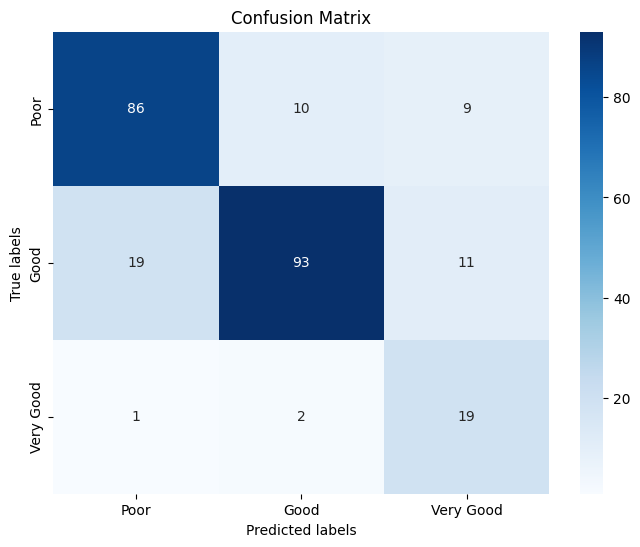

In [12]:

# Evaluate the model on test data
from sklearn.metrics import classification_report, confusion_matrix

# Predict probabilities for test data
y_pred_prob = model.predict(test_images)
# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
# Convert one-hot encoded test labels to class labels
y_true = np.argmax(test_labels, axis=1)

# Calculate precision, recall, and F1-score
report = classification_report(y_true, y_pred, target_names=classes)
print("Classification Report:\n", report)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()